# Análise Exploratória dos Dados (EDA) 

In [105]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [104]:
PATH="../dados/input/"

SIGLAS = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE',
  'DF', 'ES', 'GO', 'MA',
  'MG', 'MS', 'MT', 'PA', 'PB',
  'PE', 'PI', 'PR', 'RJ',
  'RN', 'RO', 'RR', 'RS',
  'SC', 'SE', 'SP', 'TO']


In [106]:
df = pd.read_csv(f"{PATH}input.csv")

In [107]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
preco_ton,47.147722
producao,41.379310
preco_kg,33.301405
preco_saco,33.301405
desemprego,7.024266
idh_l,0.000000
estoque,0.000000
nfsp,0.000000
idh_e,0.000000
idh_r,0.000000


In [108]:
df[df["preco_kg"].notna()]

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_l,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg
424,AL,1997-05-01,1.455278e+06,5.178943e+05,0.531675,1.461948e+06,2663071.0,0.86,3.53,0.30,...,0.552,0.527,0.174,2.02,5.513763e+06,7.972121,NaN,NaN,6.50,0.1300
425,AL,1997-06-01,1.455278e+06,5.178943e+05,0.531675,1.461948e+06,2663071.0,1.11,4.09,0.70,...,0.552,0.527,0.174,1.92,5.513763e+06,7.972121,NaN,NaN,6.50,0.1300
426,AL,1997-07-01,1.455278e+06,5.178943e+05,0.531675,1.461948e+06,2663071.0,0.51,4.31,0.09,...,0.552,0.527,0.174,1.86,5.513763e+06,7.972121,NaN,NaN,5.00,0.1000
427,AL,1997-08-01,1.455278e+06,5.178943e+05,0.531675,1.461948e+06,2663071.0,1.18,4.29,-0.04,...,0.552,0.527,0.174,1.86,5.513763e+06,7.972121,NaN,NaN,4.50,0.0900
428,AL,1997-09-01,1.455278e+06,5.178943e+05,0.531675,1.461948e+06,2663071.0,0.27,4.36,0.59,...,0.552,0.527,0.174,1.85,5.513763e+06,7.972121,NaN,NaN,4.50,0.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,SP,2019-08-01,9.366423e+07,1.646092e+08,2.039769,3.798761e+07,45919049.0,0.42,2.54,-0.51,...,0.850,0.800,0.830,0.62,7.827728e+06,11.900000,-999.0,102.687032,20.64,0.4128
9044,SP,2019-09-01,9.366423e+07,1.646092e+08,2.039769,3.798761e+07,45919049.0,0.46,2.49,0.50,...,0.850,0.800,0.830,0.59,7.827728e+06,11.900000,113650.0,100.594444,20.73,0.4146
9045,SP,2019-10-01,9.366423e+07,1.646092e+08,2.039769,3.798761e+07,45919049.0,0.18,2.60,0.55,...,0.850,0.800,0.830,0.57,7.827728e+06,11.800000,-999.0,101.426025,20.72,0.4144
9046,SP,2019-11-01,9.366423e+07,1.646092e+08,2.039769,3.798761e+07,45919049.0,0.04,3.12,0.85,...,0.850,0.800,0.830,0.54,7.827728e+06,11.300000,142172.0,99.823240,20.74,0.4148


In [109]:
df = df[df["data"] >= "1991-01-01"].reset_index(drop=True)

In [110]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
preco_ton,47.147722
producao,41.379310
preco_kg,33.301405
preco_saco,33.301405
desemprego,7.024266
idh_l,0.000000
estoque,0.000000
nfsp,0.000000
idh_e,0.000000
idh_r,0.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estados     9396 non-null   object 
 1   data        9396 non-null   object 
 2   pib_pc      9396 non-null   float64
 3   pib_pmc     9396 non-null   float64
 4   pib_pcpt    9396 non-null   float64
 5   pib_cc      9396 non-null   float64
 6   populacao   9396 non-null   float64
 7   incc        9396 non-null   float64
 8   ipca        9396 non-null   float64
 9   igp         9396 non-null   float64
 10  selic       9396 non-null   float64
 11  idh_l       9396 non-null   float64
 12  idh_r       9396 non-null   float64
 13  idh_e       9396 non-null   float64
 14  nfsp        9396 non-null   float64
 15  estoque     9396 non-null   float64
 16  desemprego  8736 non-null   float64
 17  producao    5508 non-null   float64
 18  preco_ton   4966 non-null   float64
 19  preco_saco  6267 non-null  

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pib_pc,9396.0,8.884727e+06,1.546512e+07,2.223599e+05,1.639188e+06,3.885204e+06,8.752338e+06,9.546031e+07
pib_pmc,9396.0,7.740387e+06,1.729196e+07,4.712304e+00,6.250891e+05,2.440144e+06,7.458359e+06,1.646092e+08
pib_pcpt,9396.0,1.110849e+00,6.659869e-01,3.445102e-01,6.778617e-01,9.293817e-01,1.353092e+00,3.999760e+00
pib_cc,9396.0,6.355513e+06,1.012706e+07,2.293989e+03,1.293523e+06,2.843779e+06,6.931119e+06,6.351618e+07
populacao,9396.0,6.677788e+06,7.956398e+06,2.175830e+05,2.169688e+06,3.474998e+06,8.513497e+06,4.591905e+07
incc,9396.0,3.894282e+00,9.559014e+00,-5.000000e-01,2.975000e-01,5.750000e-01,1.122500e+00,5.571000e+01
ipca,9396.0,6.740652e+01,2.416155e+02,2.900000e-01,2.045000e+00,3.750000e+00,6.580000e+00,2.477150e+03
igp,9396.0,3.878477e+00,9.252582e+00,-1.240000e+00,2.300000e-01,6.800000e-01,1.462500e+00,4.658000e+01
selic,9396.0,2.006583e-01,4.000198e-01,1.781129e-02,4.164407e-02,5.940236e-02,8.976048e-02,2.029579e+00
idh_l,9396.0,7.304342e-01,8.184223e-02,5.510000e-01,6.760000e-01,7.400000e-01,8.000000e-01,8.900000e-01


In [113]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

C:\Users\julia\AppData\Local\Temp\ipykernel_18356\846124379.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


preco_saco  preco_kg      1.000000
igp         selic         0.979787
incc        igp           0.973572
            selic         0.972561
pib_pc      pib_cc        0.952784
            populacao     0.950439
pib_cc      populacao     0.932531
igp         nfsp          0.924957
idh_l       idh_e         0.923898
selic       nfsp          0.913663
incc        nfsp          0.897863
idh_l       idh_r         0.873916
idh_e       estoque       0.855610
pib_pc      pib_pmc       0.848182
estoque     preco_saco    0.846456
            preco_kg      0.846456
pib_pcpt    idh_r         0.795270
pib_pmc     populacao     0.792921
idh_r       idh_e         0.786137
idh_l       estoque       0.771353
pib_pmc     pib_cc        0.730437
dtype: float64

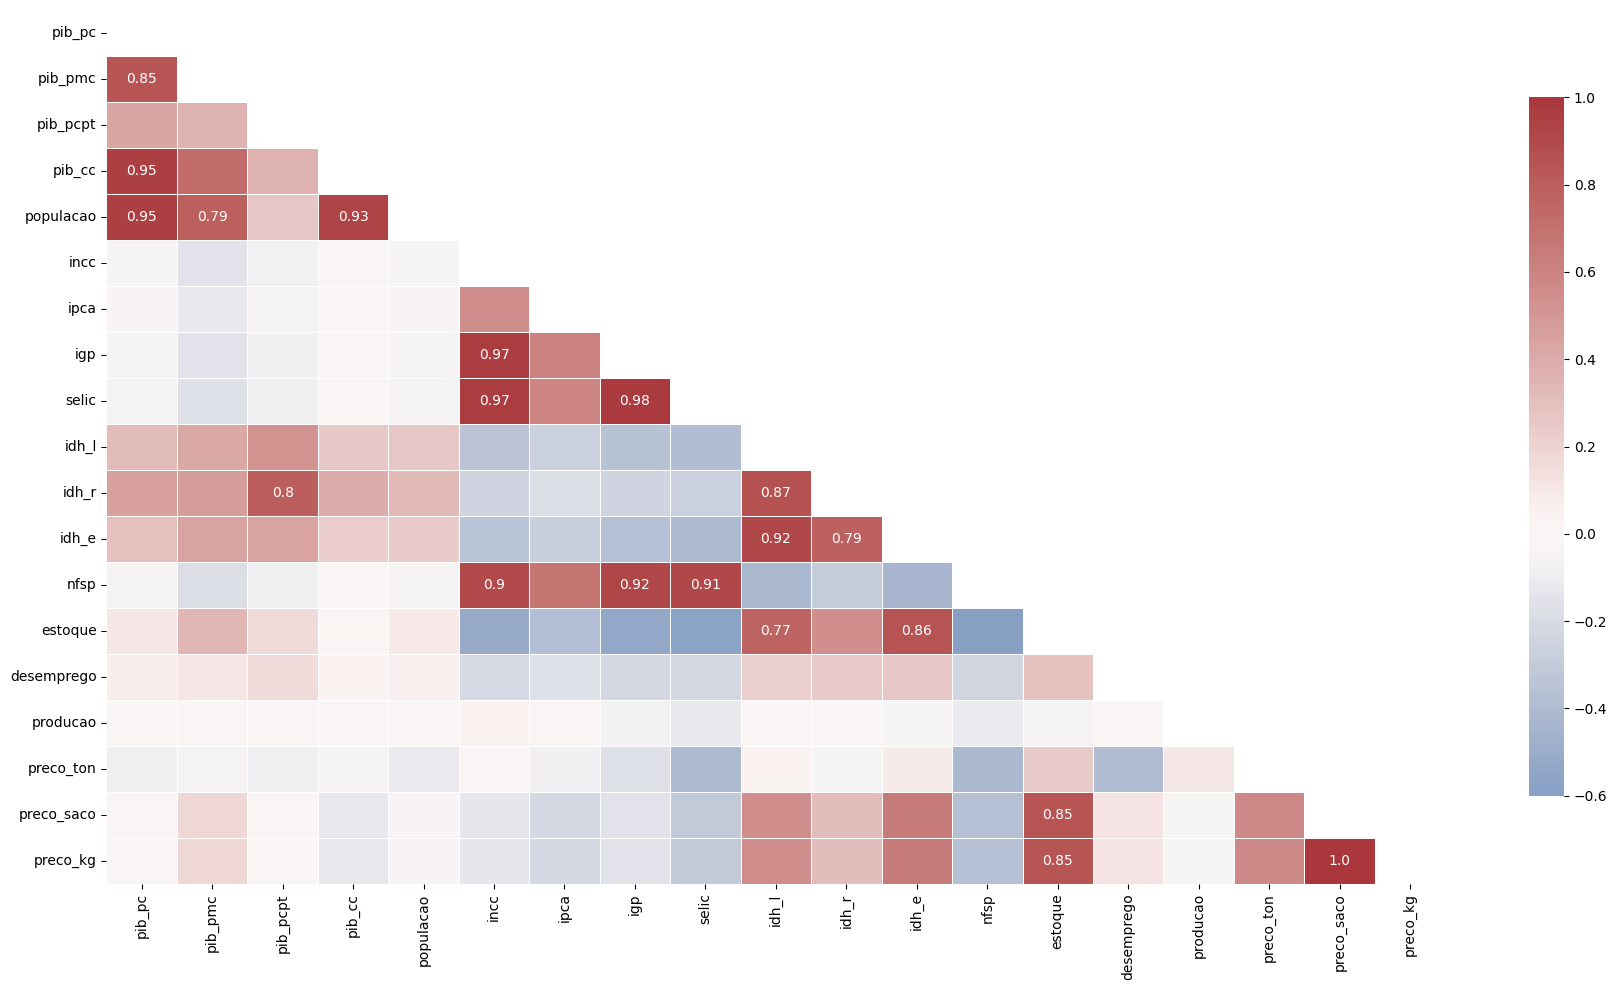

In [114]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(18, 10))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

# Consumo

In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/input/target.csv")

In [94]:
df.head()

,estados,data,consumo
0,RO,1990-01-01,9903.0
1,AC,1990-01-01,1450.0
2,AM,1990-01-01,21819.0
3,RR,1990-01-01,2040.0
4,PA,1990-01-01,45604.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   estados  9072 non-null   object 
 1   data     9072 non-null   object 
 2   consumo  9072 non-null   float64
dtypes: float64(1), object(2)
memory usage: 212.8+ KB


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consumo,9072.0,134429.42049,195739.563665,0.0,28027.25,66136.0,161813.75,1491696.0


In [97]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
estados,0.000000
data,0.000000
consumo,0.000000


In [102]:
df=df.set_index('data')

C:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


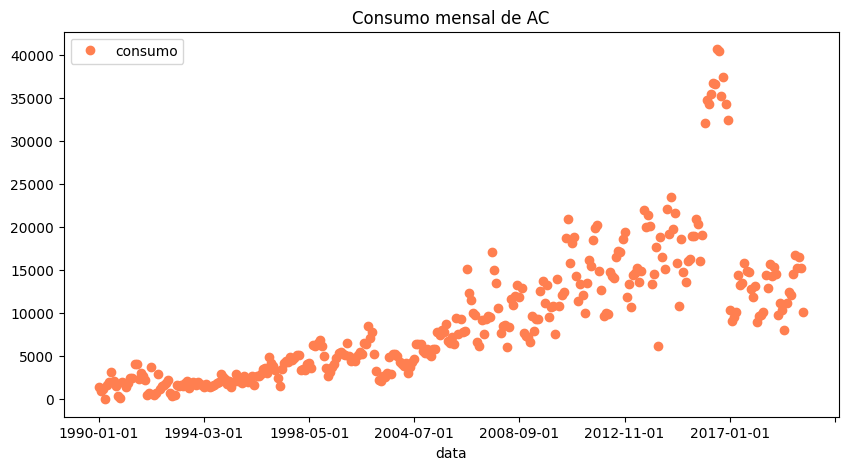

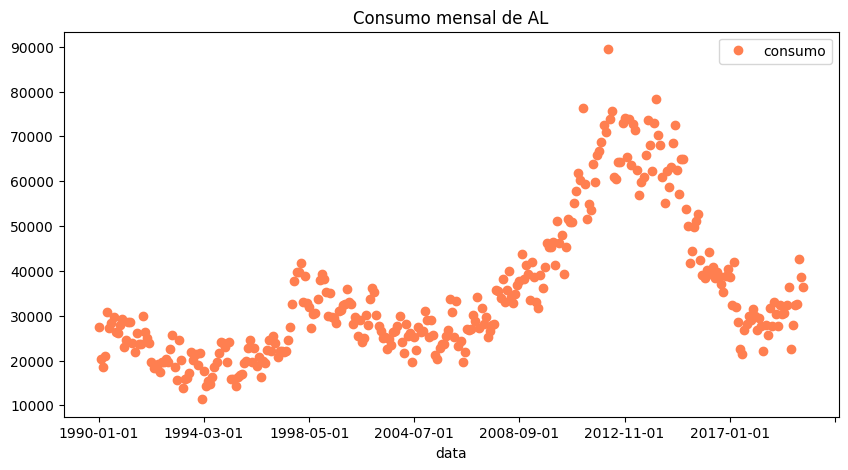

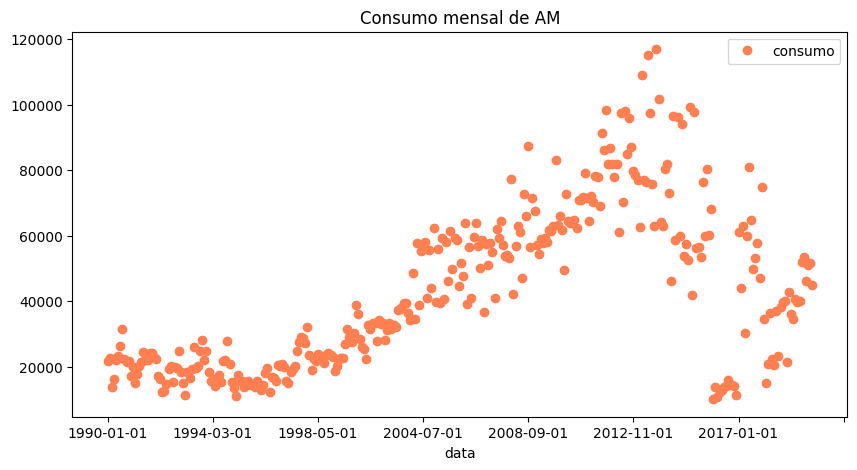

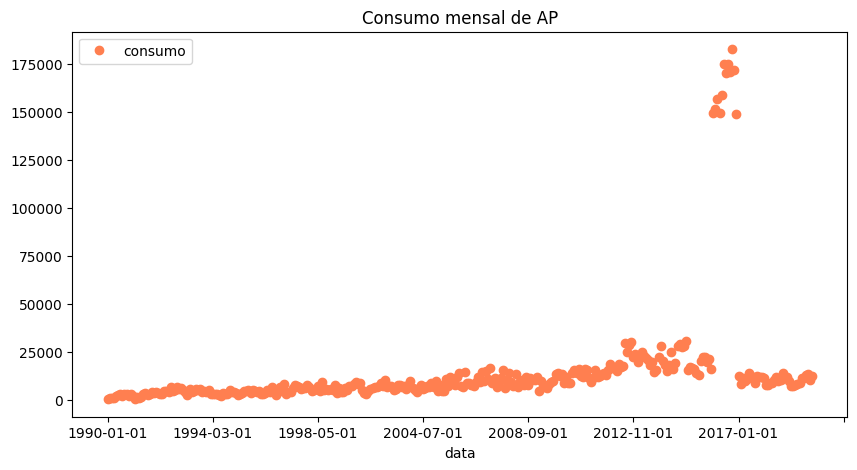

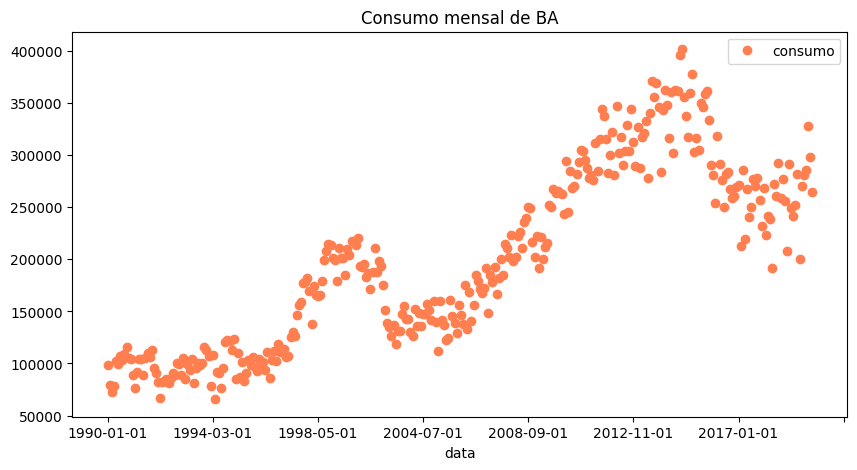

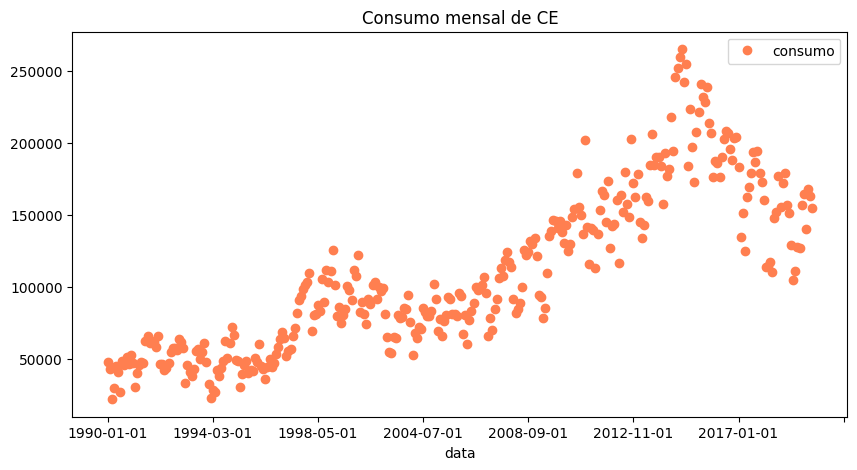

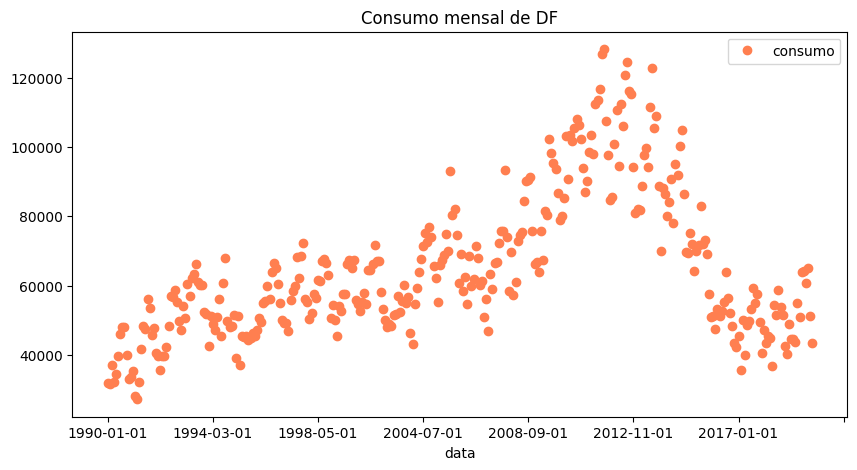

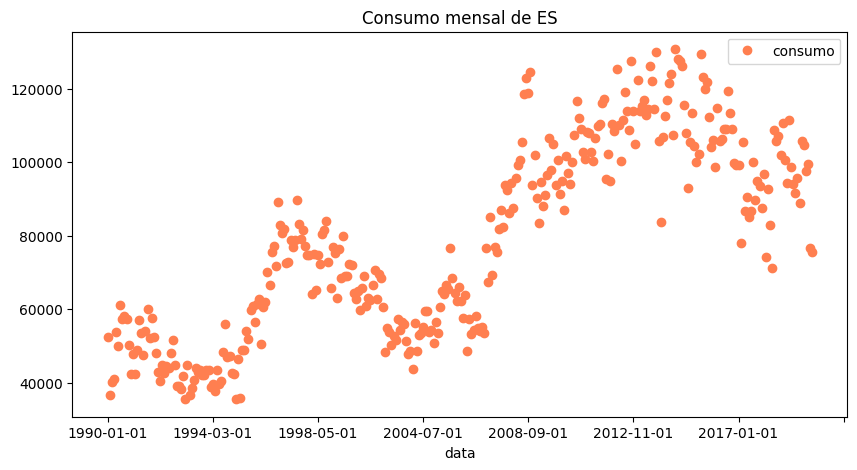

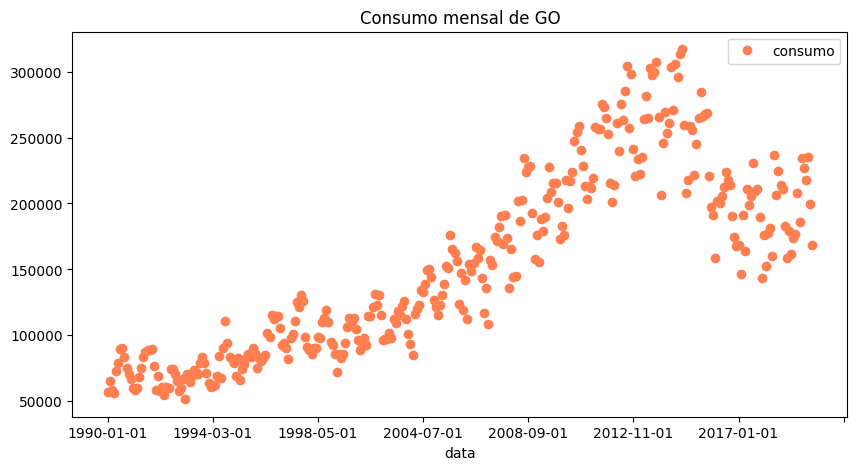

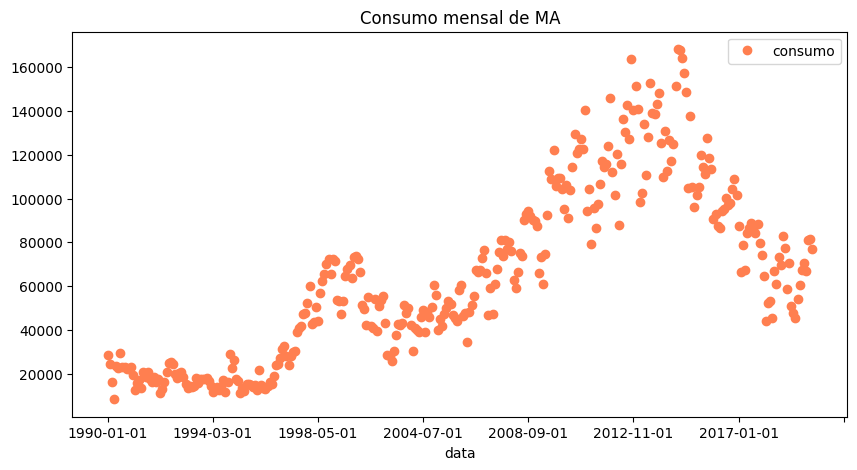

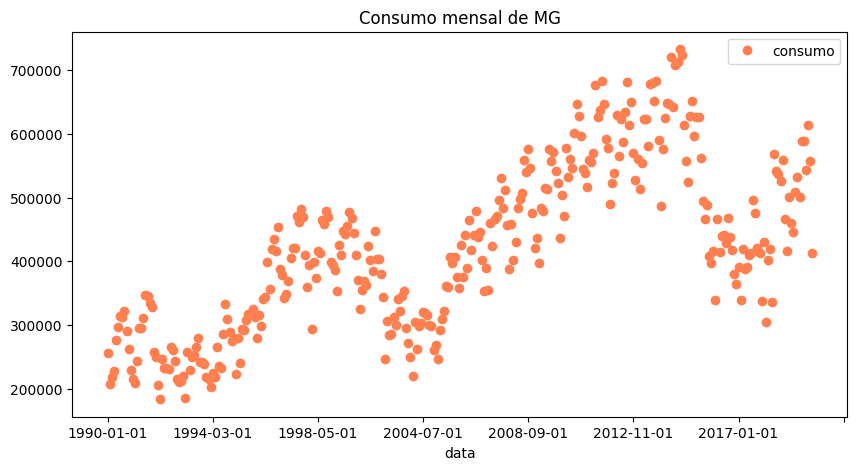

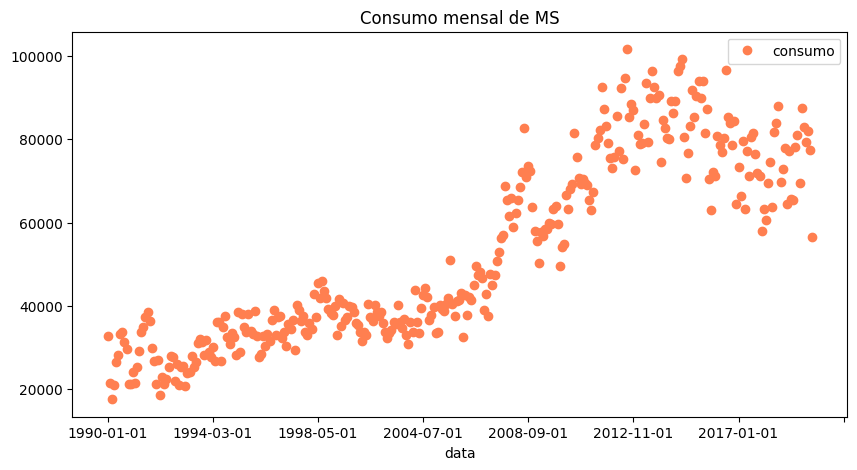

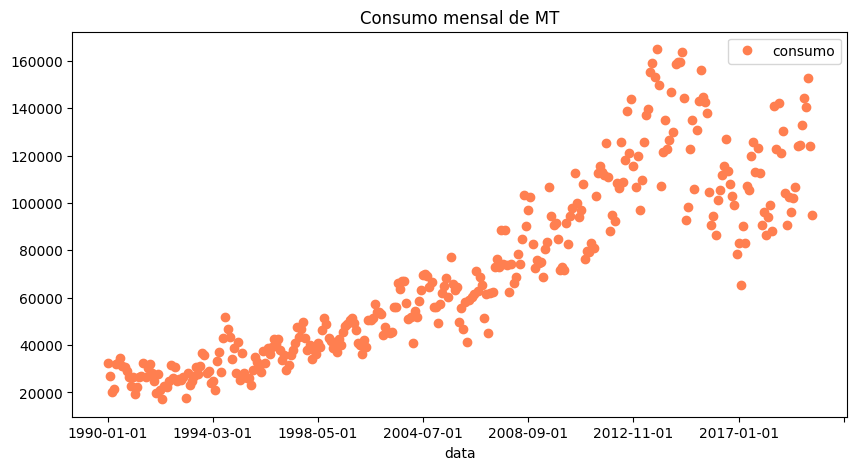

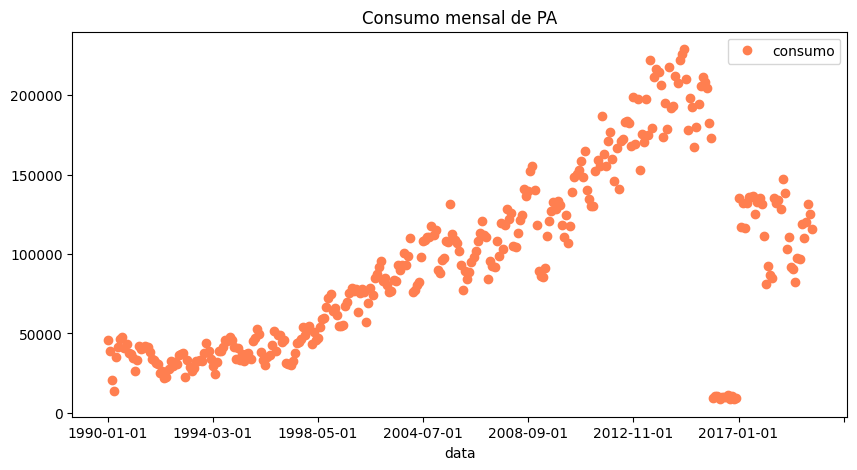

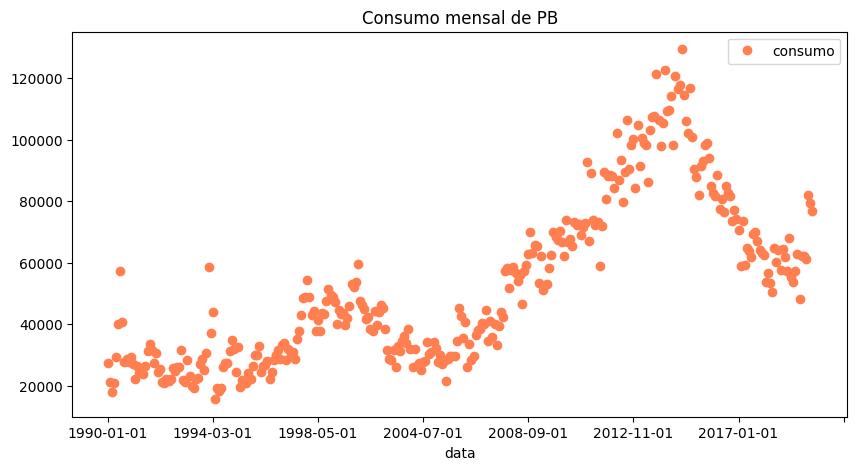

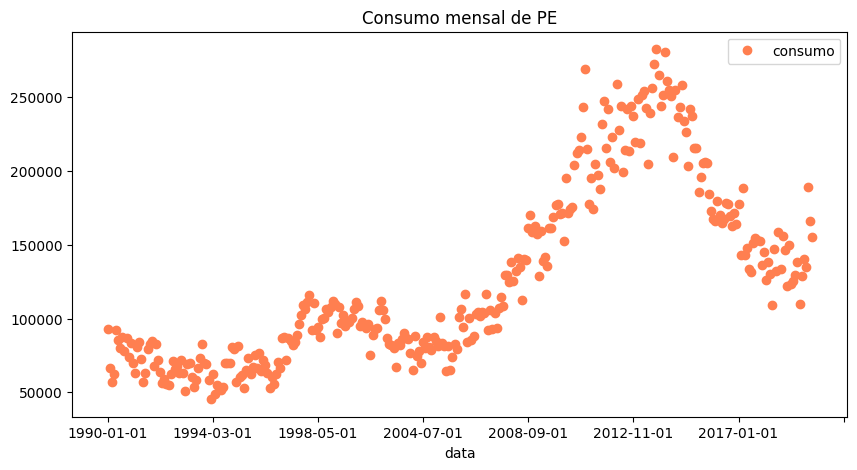

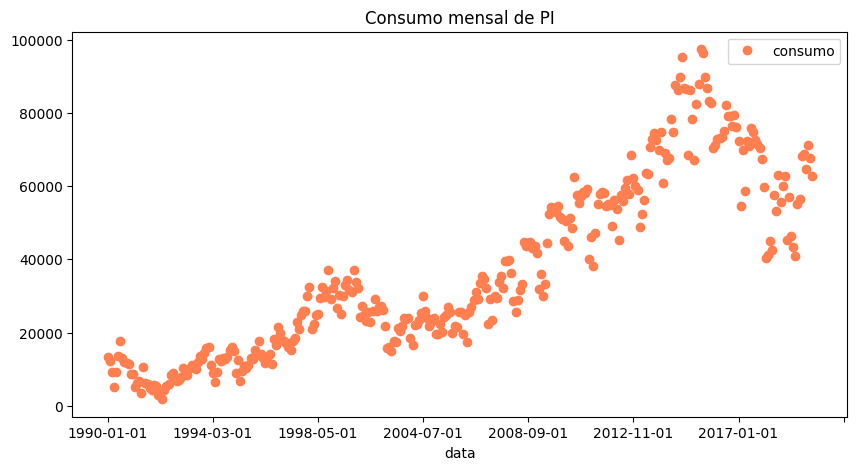

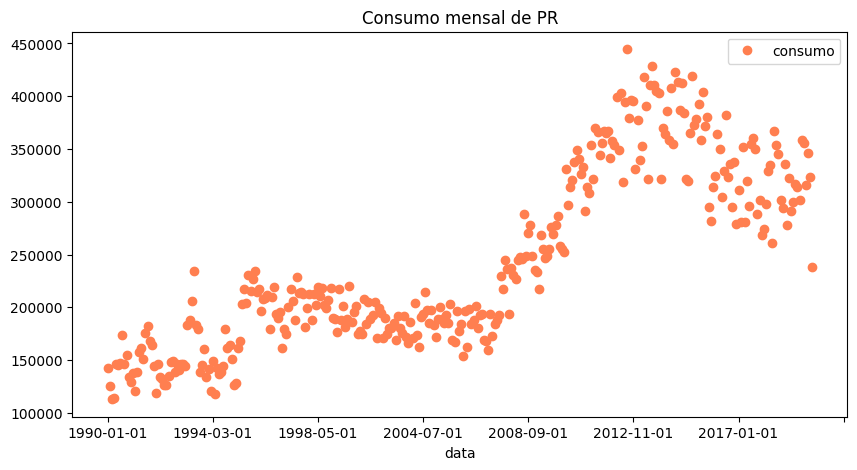

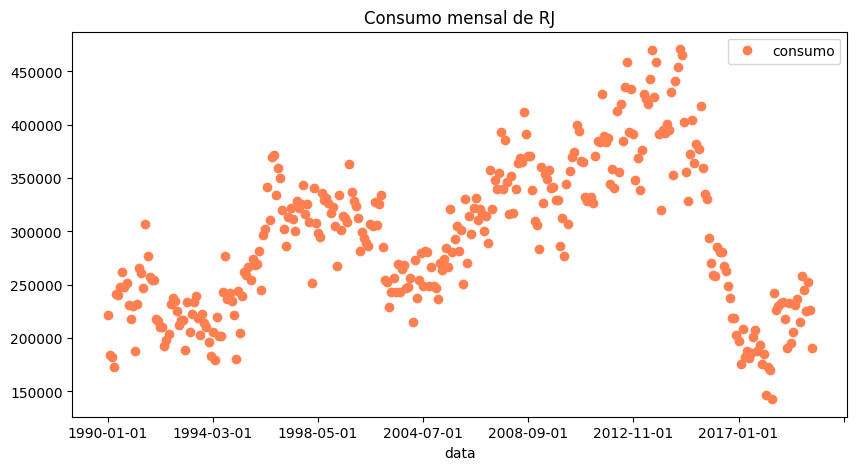

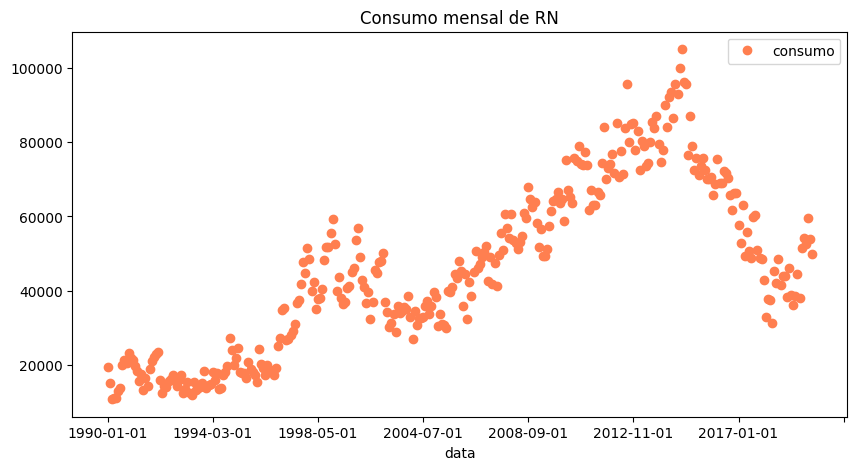

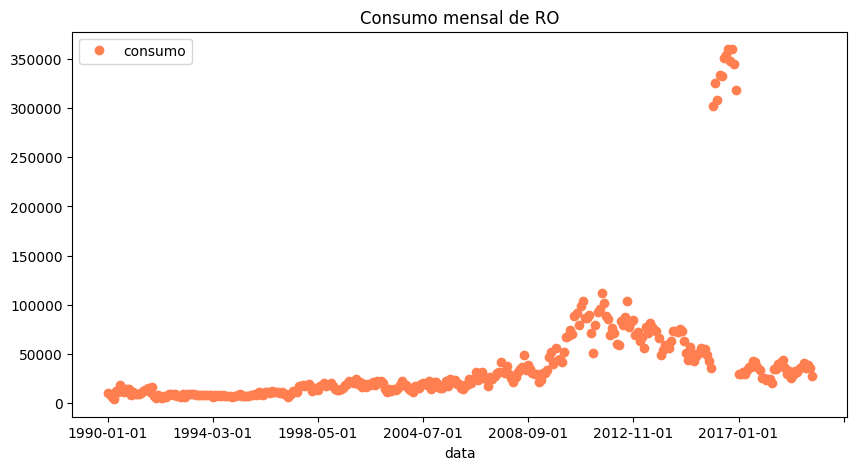

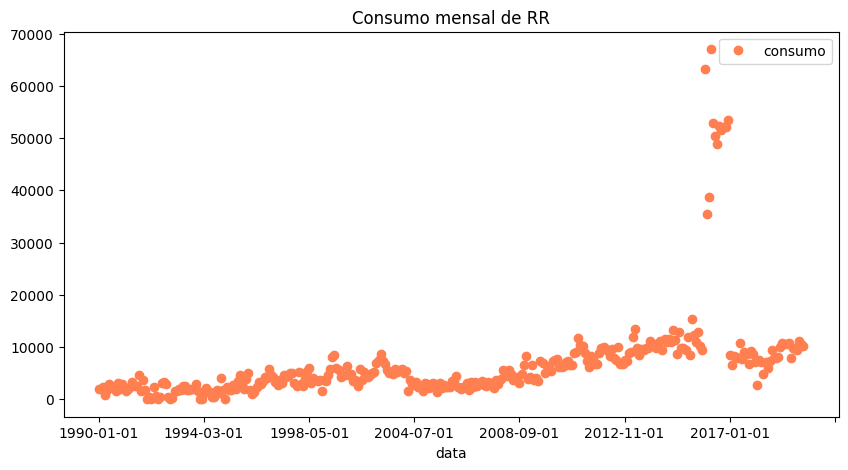

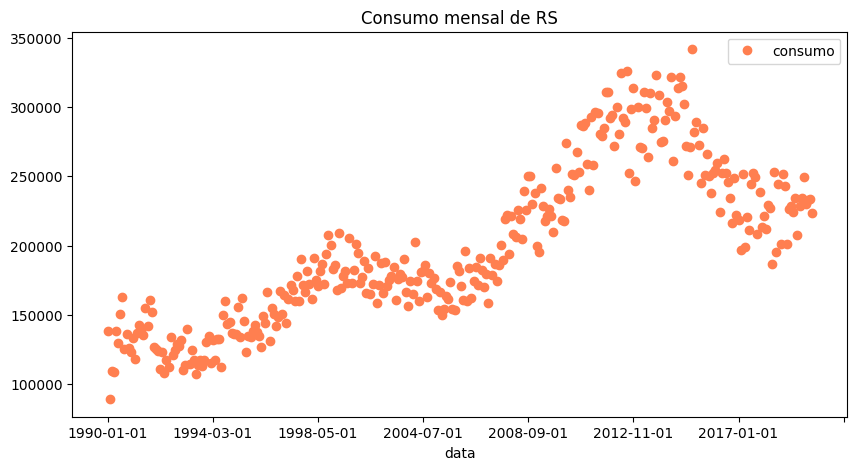

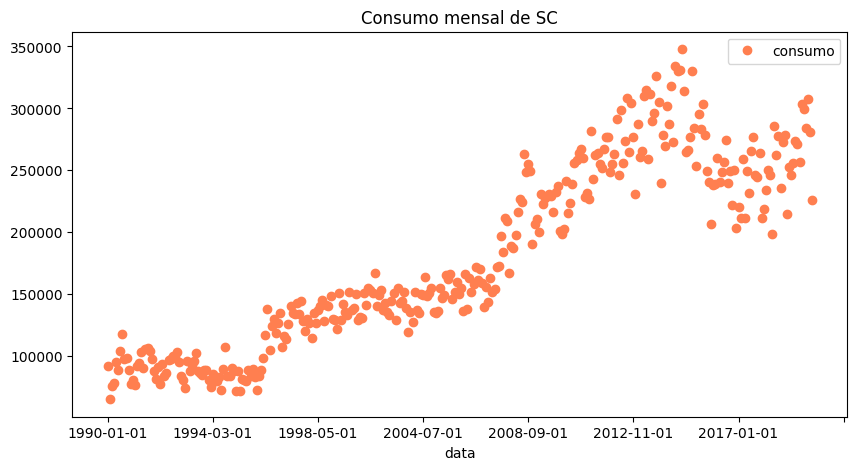

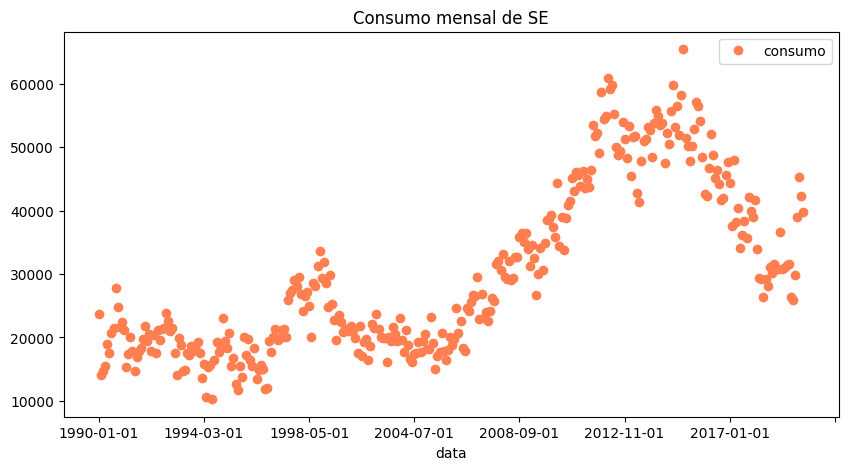

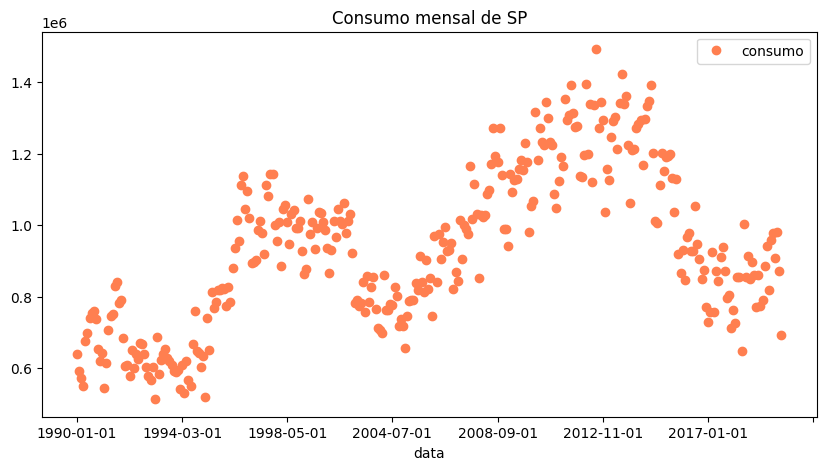

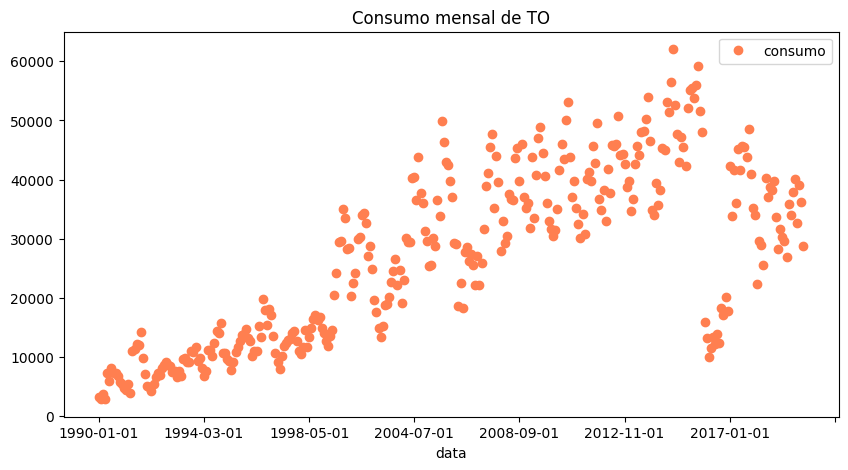

In [103]:
for state in range(27):
        
    df[df['estados'] == SIGLAS[state]].plot(figsize=(10,5), linestyle=" ", marker="o", color="coral", title=f"Consumo mensal de {SIGLAS[state]}")
    
    #aux = df[df['estados'] == SIGLAS[state]].copy()

    #plt.scatter(aux.index,aux['consumo'], color="coral")